In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [2]:
file_names = [
    "/home/eharpu/shannon/Plotting/combined_df_chr1.csv",
    "/home/eharpu/shannon/Plotting/combined_df_chr2.csv",
    "/home/eharpu/shannon/Plotting/combined_df_chr3.csv",
    "/home/eharpu/shannon/Plotting/combined_df_chr4.csv",
    "/home/eharpu/shannon/Plotting/combined_df_chr5.csv",  
]


df1 = pd.read_csv(file_names[0])
df2 = pd.read_csv(file_names[1])
df3 = pd.read_csv(file_names[2])
df4 = pd.read_csv(file_names[3])
df5 = pd.read_csv(file_names[4])


In [3]:
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)



In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42905060 entries, 0 to 42905059
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   interval                  object 
 1   aerial-part-CHG           float64
 2   embryo-CHG                float64
 3   endosperm-CHG             float64
 4   immature-flower-buds-CHG  float64
 5   inflorescence-CHG         float64
 6   root-CHG                  float64
 7   rosette-CHG               float64
 8   shoot-CHG                 float64
 9   sperm-cell-CHG            float64
 10  vegetative-nucleus-CHG    float64
 11  whole-organism-CHG        float64
 12  aerial-part-CHH           float64
 13  embryo-CHH                float64
 14  endosperm-CHH             float64
 15  immature-flower-buds-CHH  float64
 16  inflorescence-CHH         float64
 17  root-CHH                  float64
 18  rosette-CHH               float64
 19  shoot-CHH                 float64
 20  sperm-cell-CHH        

In [5]:
combined_df.head()

,interval,aerial-part-CHG,embryo-CHG,endosperm-CHG,immature-flower-buds-CHG,inflorescence-CHG,root-CHG,rosette-CHG,shoot-CHG,sperm-cell-CHG,...,embryo-CpG,endosperm-CpG,immature-flower-buds-CpG,inflorescence-CpG,root-CpG,rosette-CpG,shoot-CpG,sperm-cell-CpG,vegetative-nucleus-CpG,whole-organism-CpG
0,0-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100-101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000-1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000-100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#average_df = combined_df.mean()

#average_df

In [108]:
#combined_df.to_csv("combined_df_All.csv")
combined_df = pd.read_csv("combined_df_All.csv")

In [109]:
combined_df = combined_df.rename(columns=lambda x: '-'.join(x.split('-')[::-1]).replace('CpG', 'CG'))

print(combined_df.columns)


row_labels = [
    'CHG-rosette',
    'CHH-rosette',
    'CHG-endosperm',
    'CHH-endosperm',
    'CHG-embryo',
    'CHH-embryo',
    'CHG-buds-flower-immature',
    'CHH-buds-flower-immature',
    'CHH-shoot',
    'CHH-root',
    'CHH-organism-whole',
    'CHH-inflorescence',
    'CHH-cell-sperm',
    'CHH-nucleus-vegetative',
    'CHG-cell-sperm',
    'CHG-nucleus-vegetative',
    'CHG-inflorescence',
    'CHG-root',
    'CHG-shoot',
    'CHG-organism-whole',
    'CHG-part-aerial',
    'CHH-part-aerial',
    'CG-part-aerial',
    'CG-rosette',
    'CG-root',
    'CG-organism-whole',
    'CG-shoot',
    'CG-cell-sperm',
    'CG-nucleus-vegetative',
    'CG-buds-flower-immature',
    'CG-inflorescence',
    'CG-embryo',
    'CG-endosperm'
]

col_labels = row_labels



Index(['interval', 'CHG-part-aerial', 'CHG-embryo', 'CHG-endosperm',
       'CHG-buds-flower-immature', 'CHG-inflorescence', 'CHG-root',
       'CHG-rosette', 'CHG-shoot', 'CHG-cell-sperm', 'CHG-nucleus-vegetative',
       'CHG-organism-whole', 'CHH-part-aerial', 'CHH-embryo', 'CHH-endosperm',
       'CHH-buds-flower-immature', 'CHH-inflorescence', 'CHH-root',
       'CHH-rosette', 'CHH-shoot', 'CHH-cell-sperm', 'CHH-nucleus-vegetative',
       'CHH-organism-whole', 'CG-part-aerial', 'CG-embryo', 'CG-endosperm',
       'CG-buds-flower-immature', 'CG-inflorescence', 'CG-root', 'CG-rosette',
       'CG-shoot', 'CG-cell-sperm', 'CG-nucleus-vegetative',
       'CG-organism-whole'],
      dtype='object')


In [160]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[0])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 30000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman', numeric_only = True)

correlation_matrix[correlation_matrix <0] = correlation_matrix[correlation_matrix <0] * -1

correlation_matrix = correlation_matrix.loc[row_labels, col_labels]

from scipy.cluster.hierarchy import linkage

row_linkage = linkage(correlation_matrix, method='single', metric='euclidean')


def adjust_and_scale_value_optimized(value):
    if value == 1:
        return 1
    
    increased_value = value * 1.1
    increased_value = min(increased_value, 0.98)
    
    while increased_value < 0.56:
        scale_factor = 1.1
        increased_value *= scale_factor
        if increased_value > 0.98:  # Ensure it does not exceed 0.98 after scaling
            return 0.98
    
    return increased_value

correlation_matrix =correlation_matrix.applymap(adjust_and_scale_value)

sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="vlag",
                           row_colors=col_colors, col_colors=col_colors,
                           row_cluster=False, 
                           col_cluster=False,
                           #row_linkage=row_linkage, 
                           linewidths=0.75, figsize=(10, 10))


plt.show()


KeyboardInterrupt: 

In [151]:
correlation_matrix

,CHG-rosette,CHH-rosette,CHG-endosperm,CHH-endosperm,CHG-embryo,CHH-embryo,CHG-buds-flower-immature,CHH-buds-flower-immature,CHH-shoot,CHH-root,...,CG-rosette,CG-root,CG-organism-whole,CG-shoot,CG-cell-sperm,CG-nucleus-vegetative,CG-buds-flower-immature,CG-inflorescence,CG-embryo,CG-endosperm
CHG-rosette,1.000000,0.269643,0.440707,0.495279,0.431108,0.483390,0.368964,0.491687,0.494855,0.486429,...,0.597940,0.504232,0.424230,0.362131,0.461665,0.245585,0.430249,0.419966,0.283241,0.226910
CHH-rosette,0.269643,1.000000,0.838524,0.880529,0.875727,0.892678,0.841925,0.865400,0.899167,0.880754,...,0.758929,0.725834,0.672385,0.740005,0.644881,0.010534,0.613691,0.462117,0.176756,0.667317
CHG-endosperm,0.440707,0.838524,1.000000,0.951377,0.941356,0.937462,0.900329,0.919610,0.928850,0.925262,...,0.828802,0.704388,0.643429,0.762344,0.601947,0.067060,0.574860,0.435844,0.096071,0.765962
CHH-endosperm,0.495279,0.880529,0.951377,1.000000,0.952732,0.981979,0.902395,0.963743,0.974614,0.959775,...,0.861016,0.752223,0.693996,0.767897,0.646065,0.036462,0.624574,0.470632,0.145655,0.735049
CHG-embryo,0.431108,0.875727,0.941356,0.952732,1.000000,0.967104,0.925596,0.939928,0.959520,0.954897,...,0.858649,0.730675,0.683503,0.779657,0.634621,0.059568,0.608093,0.455996,0.106572,0.758746
CHH-embryo,0.483390,0.892678,0.937462,0.981979,0.967104,1.000000,0.910687,0.968860,0.987477,0.972349,...,0.868821,0.751852,0.697154,0.771620,0.649224,0.052519,0.630698,0.471984,0.138251,0.739839
CHG-buds-flower-immature,0.368964,0.841925,0.900329,0.902395,0.925596,0.910687,1.000000,0.909449,0.905254,0.901993,...,0.810391,0.701424,0.640006,0.751271,0.598291,0.096586,0.566751,0.418974,0.077639,0.747126
CHH-buds-flower-immature,0.491687,0.865400,0.919610,0.963743,0.939928,0.968860,0.909449,1.000000,0.957988,0.947103,...,0.847828,0.730963,0.669991,0.751286,0.627694,0.053796,0.600517,0.451499,0.125040,0.718628
CHH-shoot,0.494855,0.899167,0.928850,0.974614,0.959520,0.987477,0.905254,0.957988,1.000000,0.973663,...,0.878544,0.754422,0.706413,0.768999,0.653482,0.065714,0.633493,0.470272,0.143561,0.737775
CHH-root,0.486429,0.880754,0.925262,0.959775,0.954897,0.972349,0.901993,0.947103,0.973663,1.000000,...,0.869684,0.729162,0.692950,0.770188,0.652308,0.051825,0.646265,0.472369,0.143183,0.725275


In [ ]:

#correlation_matrix[correlation_matrix < 0] = correlation_matrix[correlation_matrix < 0] ** 2

#correlation_matrix = correlation_matrix.abs() 

#correlation_matrix = correlation_matrix[correlation_matrix > 0.5]

#correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)

#correlation_matrix = correlation_matrix ** 2

def adjust_and_scale_value(value):
    increased_value = value * 1.15
    increased_value = min(increased_value, 1.0)
    
    if increased_value < 0.56:
        scale_factor = 0.56 / increased_value
        increased_value *= scale_factor
        increased_value = min(increased_value, 1.0)  # Ensure it does not exceed 1.0 after scaling
    
    return increased_value

#correlation_matrix =correlation_matrix.applymap(adjust_and_scale_value)

#correlation_matrix = correlation_matrix * 

#correlation_matrix[correlation_matrix < 0] = correlation_matrix[correlation_matrix < 0] * -1

# Increase values by 10% but cap at 1.0
#correlation_matrix = correlation_matrix.applymap(lambda x: min(x * 1.1, 1.0))


min_value_after_increase = correlation_matrix.min().min() * 1.1
if min_value_after_increase < 0.5:
    # Calculate scale factor needed to bring the minimum value to 0.5
    scale_factor = 0.5 / correlation_matrix.min().min()
    correlation_matrix = correlation_matrix.applymap(lambda x: min(x * scale_factor, 1.0))
else:
    correlation_matrix = correlation_matrix.applymap(lambda x: min(x * 1.1, 1.0))

correlation_matrix = correlation_matrix * -1
correlation_matrix = correlation_matrix.abs()
correlation_matrix = correlation_matrix * 1.9
correlation_matrix = correlation_matrix.applymap(lambda x: min(x * 1.1, 1.0))





def scale_dataframe(df):
    min_value = df.min().min()
    if min_value < 0.5:
        # Calculate the scale factor to make the smallest value equal to 0.5
        scale_factor = 0.5 / min_value
        # Scale up all values, but cap them at 1.0
        df = df.applymap(lambda x: min(x * scale_factor, 1.0))
    return df

# Apply the scaling function to the DataFrame
#correlation_matrix = scale_dataframe(correlation_matrix)


sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="vlag",
                           row_colors=col_colors, col_colors=col_colors,
                           linewidths=0.75, figsize=(10, 10))


plt.show()

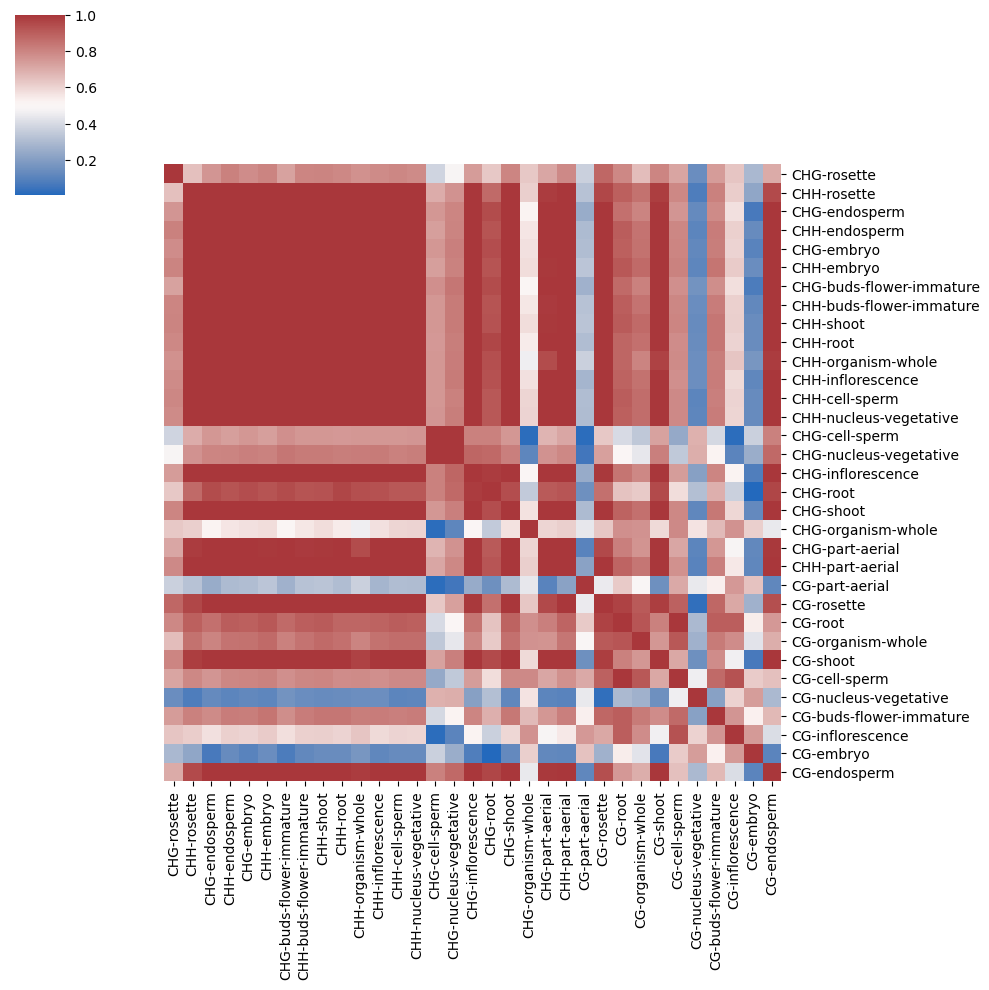

In [120]:
# Perform the clustering using the original data
#clustergrid = sns.clustermap(correlation_matrix, cmap='vlag', linewidths=.5, figsize=(10, 10))

sns.clustermap(correlation_matrix, 
               row_cluster=False, # Disabling row clustering
               col_cluster=False, # Enable or disable column clustering as needed
               figsize=(10, 10), # You can adjust the figure size as needed
               cbar_kws=None, 
               #metric='euclidean', 
               #method='average',
               standard_scale=None, 
               z_score=None,
               cmap='vlag'
               )



In [154]:
correlation_matrix.to_csv("corr.csv")

In [114]:
correlation_matrix

,CHG-rosette,CHH-rosette,CHG-endosperm,CHH-endosperm,CHG-embryo,CHH-embryo,CHG-buds-flower-immature,CHH-buds-flower-immature,CHH-shoot,CHH-root,...,CG-rosette,CG-root,CG-organism-whole,CG-shoot,CG-cell-sperm,CG-nucleus-vegetative,CG-buds-flower-immature,CG-inflorescence,CG-embryo,CG-endosperm
CHG-rosette,1.006766,0.591466,0.689366,0.737854,0.708415,0.730024,0.660588,0.727501,0.729201,0.721858,...,0.798256,0.721844,0.597093,0.725963,0.653626,0.128155,0.674945,0.578823,0.264257,0.637717
CHH-rosette,0.591466,1.006766,0.924009,0.936932,0.933390,0.943054,0.932931,0.941530,0.948037,0.942133,...,0.872623,0.816350,0.772265,0.893504,0.721041,0.072418,0.738353,0.562389,0.207309,0.865745
CHG-endosperm,0.689366,0.924009,1.006766,0.984489,0.982718,0.972395,0.974905,0.969875,0.971768,0.976686,...,0.907254,0.776916,0.730368,0.930668,0.688040,0.116500,0.712156,0.519858,0.061472,0.938662
CHH-endosperm,0.737854,0.936932,0.984489,1.006766,0.983662,0.995408,0.968691,0.991394,0.992136,0.989518,...,0.936412,0.821616,0.768443,0.930118,0.723726,0.100895,0.749836,0.555507,0.120750,0.924656
CHG-embryo,0.708415,0.933390,0.982718,0.983662,1.006766,0.992871,0.974659,0.983541,0.991903,0.983814,...,0.938794,0.816293,0.774707,0.939442,0.725639,0.109801,0.745993,0.547566,0.092421,0.936385
CHH-embryo,0.730024,0.943054,0.972395,0.995408,0.992871,1.006766,0.970267,0.996605,1.002991,0.993647,...,0.949949,0.832498,0.791803,0.935394,0.734878,0.102258,0.767674,0.564524,0.127180,0.923928
CHG-buds-flower-immature,0.660588,0.932931,0.974905,0.968691,0.974659,0.970267,1.006766,0.977131,0.971390,0.972571,...,0.920652,0.790760,0.738350,0.923101,0.701692,0.145230,0.706448,0.524065,0.068340,0.937262
CHH-buds-flower-immature,0.727501,0.941530,0.969875,0.991394,0.983541,0.996605,0.977131,1.006766,0.994899,0.990338,...,0.942181,0.819110,0.770824,0.931258,0.723295,0.126256,0.747157,0.552845,0.108701,0.921941
CHH-shoot,0.729201,0.948037,0.971768,0.992136,0.991903,1.002991,0.971390,0.994899,1.006766,0.996363,...,0.950000,0.827162,0.791698,0.936345,0.728928,0.118844,0.760967,0.559491,0.123311,0.926529
CHH-root,0.721858,0.942133,0.976686,0.989518,0.983814,0.993647,0.972571,0.990338,0.996363,1.006766,...,0.938497,0.802543,0.775530,0.935299,0.710985,0.124110,0.762226,0.548804,0.124647,0.918892


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CpG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[-1])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 100000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman')

#correlation_matrix[correlation_matrix < 0] = correlation_matrix[correlation_matrix < 0] ** 2

#correlation_matrix = correlation_matrix.abs() 

#correlation_matrix = correlation_matrix[correlation_matrix > 0.5]

#correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)



fig = sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="coolwarm",
                           row_colors=col_colors, col_colors=col_colors,
                           linewidths=0.75, figsize=(10, 10))


fig.show()

In [26]:
#fig.savefig('clustermap_combined_all.jpeg')

In [10]:
correlation_matrix

,aerial-part-CHG,embryo-CHG,endosperm-CHG,immature-flower-buds-CHG,inflorescence-CHG,root-CHG,rosette-CHG,shoot-CHG,sperm-cell-CHG,vegetative-nucleus-CHG,...,embryo-CpG,endosperm-CpG,immature-flower-buds-CpG,inflorescence-CpG,root-CpG,rosette-CpG,shoot-CpG,sperm-cell-CpG,vegetative-nucleus-CpG,whole-organism-CpG
aerial-part-CHG,1.000000,0.516851,0.488891,0.416835,0.340987,2.395685e-01,-0.005359,0.477107,0.302865,0.340444,...,0.003943,0.004139,0.001505,0.001525,-8.888928e-05,-0.001541,0.006176,-0.001129,0.000318,0.000060
embryo-CHG,0.516851,1.000000,0.688631,0.572503,0.508805,3.149638e-01,-0.058179,0.698617,0.413865,0.475321,...,0.006261,0.003279,-0.001844,0.001629,2.998560e-04,-0.003880,0.007318,0.000225,-0.000162,0.000848
endosperm-CHG,0.488891,0.688631,1.000000,0.534541,0.474634,2.965461e-01,-0.049537,0.647658,0.386257,0.445259,...,0.004164,0.002596,-0.000128,0.000331,-2.751870e-03,-0.000664,0.005115,-0.002591,-0.001832,0.001679
immature-flower-buds-CHG,0.416835,0.572503,0.534541,1.000000,0.420479,2.420522e-01,0.017217,0.536520,0.312785,0.369058,...,0.004360,0.002168,0.002427,0.001079,-2.824491e-04,-0.002378,0.004928,-0.000101,0.000410,0.000285
inflorescence-CHG,0.340987,0.508805,0.474634,0.420479,1.000000,2.230463e-01,-0.031259,0.453427,0.293008,0.328352,...,0.003155,0.002155,-0.000369,0.000830,1.390115e-04,-0.002050,0.002801,-0.000353,0.000265,0.001028
root-CHG,0.239569,0.314964,0.296546,0.242052,0.223046,1.000000e+00,0.030105,0.292396,0.219316,0.229409,...,0.001916,0.001215,0.000006,0.000233,-6.603441e-07,-0.000195,0.002478,-0.001639,-0.001133,0.002385
rosette-CHG,-0.005359,-0.058179,-0.049537,0.017217,-0.031259,3.010550e-02,1.000000,-0.112176,-0.019975,-0.034124,...,-0.000065,0.000297,-0.000185,0.002342,2.754443e-03,-0.000762,-0.001274,0.000245,-0.000362,-0.001805
shoot-CHG,0.477107,0.698617,0.647658,0.536520,0.453427,2.923960e-01,-0.112176,1.000000,0.407864,0.459445,...,0.004199,0.003132,-0.003518,0.000796,3.528246e-04,-0.001702,0.005608,-0.000370,-0.001369,0.001169
sperm-cell-CHG,0.302865,0.413865,0.386257,0.312785,0.293008,2.193163e-01,-0.019975,0.407864,1.000000,0.347943,...,0.002720,0.001365,-0.000833,0.001327,9.319443e-04,-0.000010,0.002077,-0.001470,-0.001639,0.004201
vegetative-nucleus-CHG,0.340444,0.475321,0.445259,0.369058,0.328352,2.294085e-01,-0.034124,0.459445,0.347943,1.000000,...,0.002328,0.000758,-0.001003,0.000608,1.222877e-04,-0.000474,0.003470,-0.000727,-0.000406,-0.000679


In [11]:
combined_df.memory_usage(index=True).sum()

11670176320

In [12]:
combined_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 42905060 entries, 0 to 9999996
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   aerial-part-CHG           float64
 1   embryo-CHG                float64
 2   endosperm-CHG             float64
 3   immature-flower-buds-CHG  float64
 4   inflorescence-CHG         float64
 5   root-CHG                  float64
 6   rosette-CHG               float64
 7   shoot-CHG                 float64
 8   sperm-cell-CHG            float64
 9   vegetative-nucleus-CHG    float64
 10  whole-organism-CHG        float64
 11  aerial-part-CHH           float64
 12  embryo-CHH                float64
 13  endosperm-CHH             float64
 14  immature-flower-buds-CHH  float64
 15  inflorescence-CHH         float64
 16  root-CHH                  float64
 17  rosette-CHH               float64
 18  shoot-CHH                 float64
 19  sperm-cell-CHH            float64
 20  vegetative-nucleus-CHH    fl

In [13]:
11000000/50

220000.0

In [14]:
1458772.04/50

29175.4408